# Telescope observation

- Start off on a cloud day.
- Implement your weather forecast based on the above probabilities.
- Run your simulator for N days (with $N\gtrsim 10^4$).
- Prepare a plot with the number of days on the x axis and the cumulative fraction of, say, sunny days over the number of days so far on the y axis. This is called a trace-plot, showing how our estimate of p(clear) evolves as the chain samples.
- Prepare a histogram of the above plot. This reveals the distribution of p(clear).
- Use a summary statistics to determine the most likely value and an error on our estimate.

We know that: 
- p(clear tomorrow|cloudy today) = p(cloudy tomorrow|cloudy today) = 0.5
- p(clear tomorrow|clear today) = 0.9
- p(cloudy tomorrow|clear today) = 0.1

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import astroML.stats

In [49]:
#Function that determs the weather of tomorrow based on the weather today and the probability
def tomorrow(today):
    prob_today = np.random.uniform(0, 1)
    if today == 0:
        if prob_today < 0.5: return 1
        else: return 0
    if today == 1:
        if prob_today < 0.9: return 1
        else: return 0


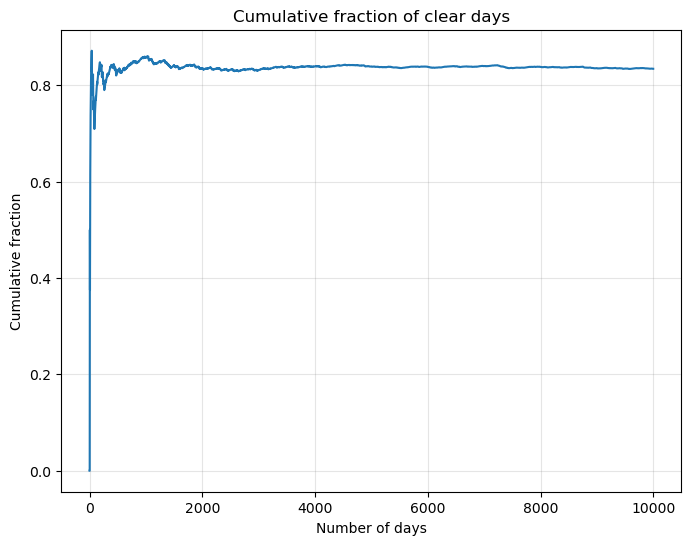

In [38]:
N=10000 #Number of days
today = 0 #We start on a cloudy day
weather = np.empty(N)
weather[0] = today 

#Determ the weather for the next N days
for i in range (N-1): 
    weather[i+1]=tomorrow(weather[i])

#Compute the cumulative probability of clear weather for different value of N
prob_clear =  np.cumsum(weather)/np.arange(1, N+1)

#Trace plot 
fig = plt.figure(figsize=(8,6))
ax = fig.gca()
ax.grid(c='grey', alpha = 0.2)
ax.set_xlabel('Number of days')
ax.set_ylabel('Cumulative fraction')
ax.set_title('Cumulative fraction of clear days')
ax.plot(prob_clear)



As we can observe from the trace plot, the process is not stationary within the first few days, we need a burn-in phase

Text(0.5, 1.0, 'Cumulative fraction of clear days histogram')

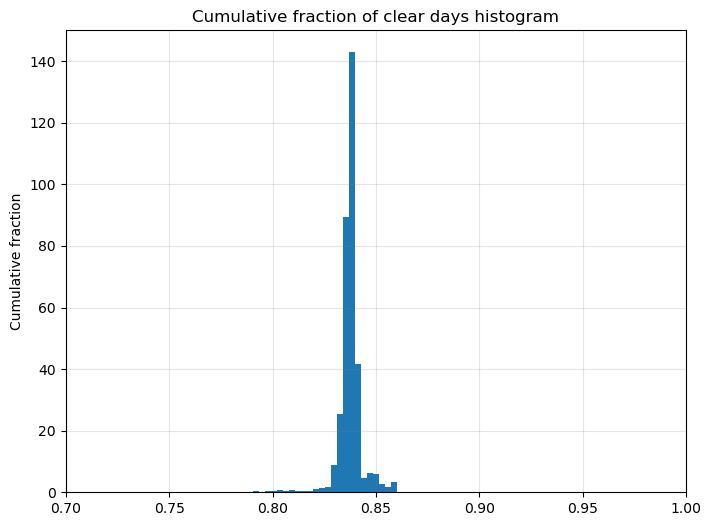

In [53]:
#Histogram 
fig1 = plt.figure(figsize=(8,6))
ax1 = fig1.gca()
ax1.grid(c='grey', alpha = 0.2)
ax1.hist(prob_clear, bins=300, density=True)
ax1.set_xlim(0.7, 1)
ax1.set_title('Cumulative fraction of clear days histogram')

In [89]:
#statistics
print(np.median(prob_clear))
print(astroML.stats.sigmaG(prob_clear))
print(min(prob_clear),max(prob_clear))

0.8377822162938662
0.0026546329400631277
0.0 0.8717948717948718


How many days should I remove in the burn-in phase?


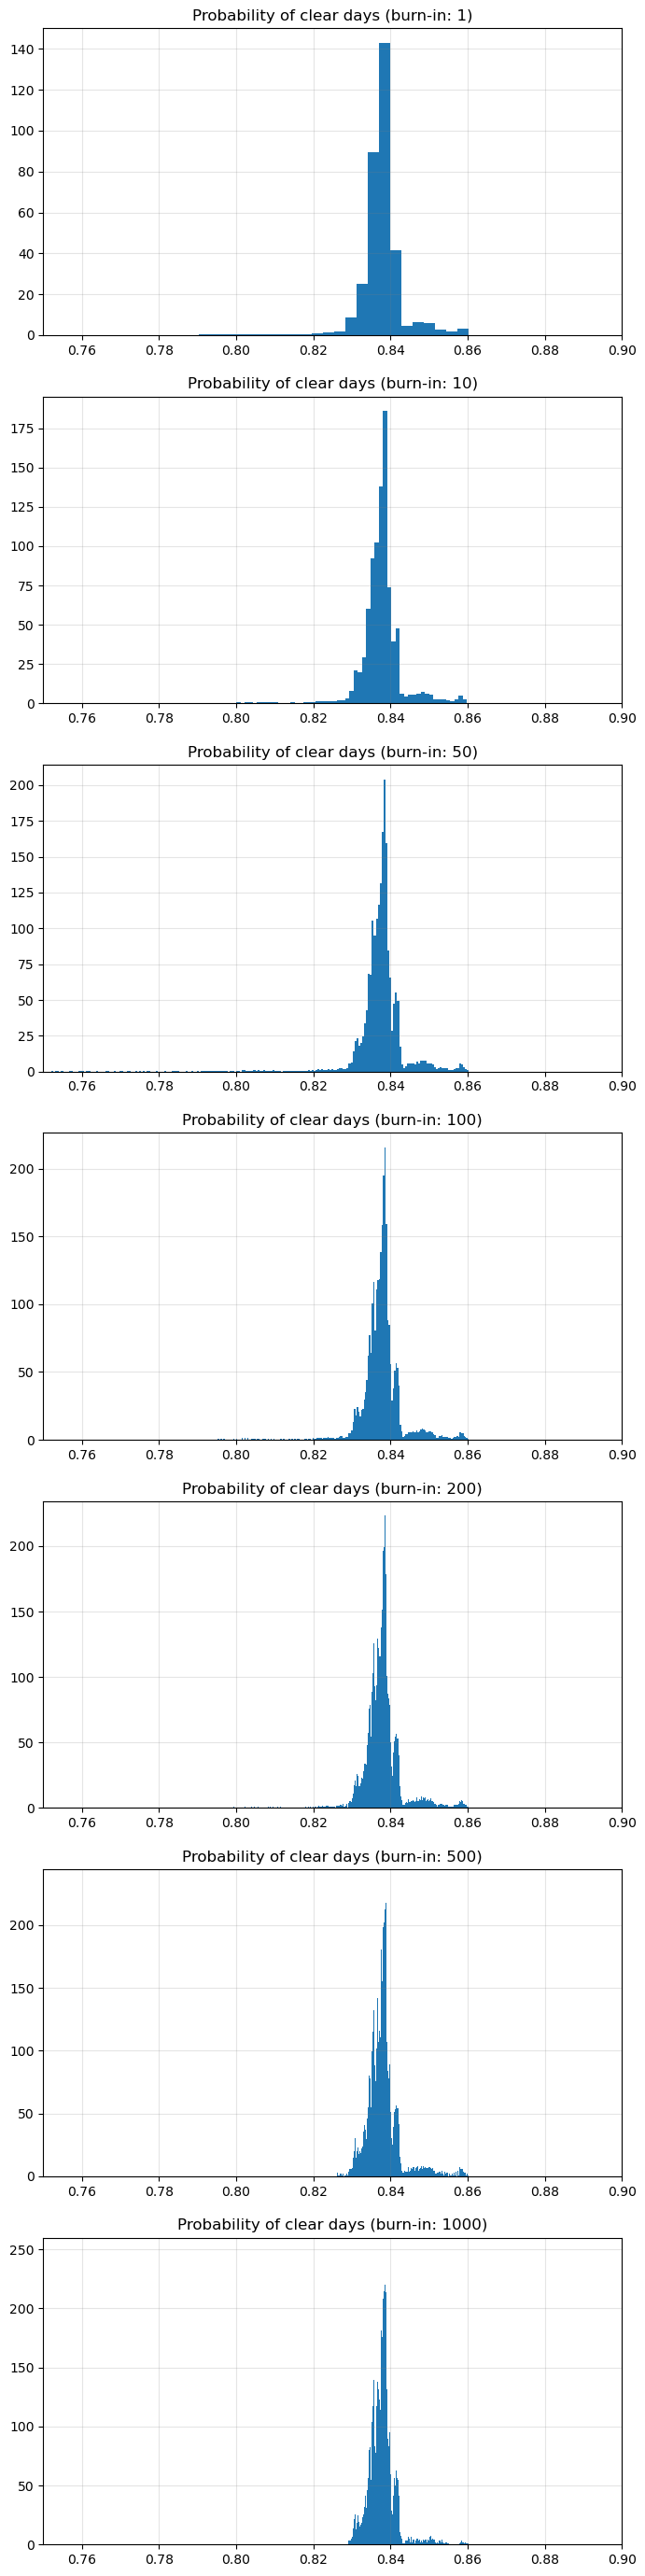

In [78]:
burns=[1, 10, 50, 100, 200, 500, 1000]

fig3, ax3 = plt.subplots(len(burns), 1, figsize = (8, 5*len(burns)))

for i, b in enumerate(burns):
    ax3[i].hist(prob_clear[b:], bins = 300, density = True)
    ax3[i].set_title(f'Probability of clear days (burn-in: {b})')
    ax3[i].grid(c='grey', alpha = 0.2)
    ax3[i].set_xlim(0.75, 0.9)

How the statistics change with different burn-in?

In [90]:
for b in burns:
    print(f"Discarding the first {b} points:\n\tmedian = {np.median(prob_clear[b:]):.3f}")
    print(f"\tstandard deviation = {astroML.stats.sigmaG(prob_clear[b:]):.3f}") #Compute the rank-based estimate of the standard deviation
    print(f"\tminimum = {min(prob_clear[b:]):.3f}")
    print(f"\tmaximum = {max(prob_clear[b:]):.3f}")

Discarding the first 1 points:
	median = 0.838
	standard deviation = 0.003
	minimum = 0.000
	maximum = 0.872
Discarding the first 10 points:
	median = 0.838
	standard deviation = 0.003
	minimum = 0.545
	maximum = 0.872
Discarding the first 50 points:
	median = 0.838
	standard deviation = 0.003
	minimum = 0.709
	maximum = 0.860
Discarding the first 100 points:
	median = 0.838
	standard deviation = 0.003
	minimum = 0.752
	maximum = 0.860
Discarding the first 200 points:
	median = 0.838
	standard deviation = 0.003
	minimum = 0.790
	maximum = 0.860
Discarding the first 500 points:
	median = 0.838
	standard deviation = 0.003
	minimum = 0.826
	maximum = 0.860
Discarding the first 1000 points:
	median = 0.838
	standard deviation = 0.002
	minimum = 0.829
	maximum = 0.860
